Michael Muschitiello // Quantitative Portfolio Management

- Loads return data from an Excel file and calculates log returns.
- Computes descriptive statistics: mean, variance, standard deviation, skewness, and kurtosis.
- Performs Jarque-Bera tests to analyze normality.
- Estimates volatility using EWMA with a rolling 3-year window.
- Generates histograms of log returns and overlays normal distribution curves.

In [1]:
import numpy as np 
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import jarque_bera
from scipy.stats import norm


In [2]:
returns = pd.read_excel("3Distributions.xlsx", sheet_name="Asset Class Data", header=0, index_col=0)
returns.head()

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5
2004-01-30,0.006266,0.034771,0.032610,0.00646,0.011827
2004-02-27,0.008428,-0.032527,0.083965,0.01999,0.023758
2004-03-31,0.004383,-0.026674,-0.003585,0.01123,0.016516
2004-04-30,-0.017804,-0.046674,-0.085476,-0.02840,-0.043864
2004-05-31,-0.002188,0.049558,0.043707,-0.00695,0.015258


In [3]:
log_returns = np.log(1 + returns)
log_returns.head()

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5
2004-01-30,0.006246,0.034180,0.032089,0.006439,0.011758
2004-02-27,0.008393,-0.033068,0.080626,0.019793,0.023481
2004-03-31,0.004373,-0.027036,-0.003592,0.011167,0.016381
2004-04-30,-0.017965,-0.047799,-0.089352,-0.028811,-0.044855
2004-05-31,-0.002190,0.048369,0.042779,-0.006974,0.015142


Computing Moments

In [4]:
moments = pd.DataFrame({
    "Mean": log_returns.mean(),
    "Variance": log_returns.var(),
    "Standard Deviation": log_returns.std(),
    "Skewness": log_returns.skew(),
    "Kurtosis": log_returns.kurt()
})
moments
# included stdev 


,Mean,Variance,Standard Deviation,Skewness,Kurtosis
Asset 1,0.003757,0.000058,0.007616,0.405976,3.179310
Asset 2,0.005529,0.002959,0.054393,-0.735989,1.112037
Asset 3,0.005137,0.005347,0.073122,-0.740547,2.623971
Asset 4,0.003452,0.000195,0.013951,0.206001,-0.234450
Asset 5,0.004310,0.000429,0.020720,-1.117895,5.960348


Jarque-Bera Test

In [5]:
jb_tests = log_returns.apply(lambda x: jarque_bera(x.dropna()))
jb_results = pd.DataFrame({
    "JB-Statistic": jb_tests.apply(lambda x: x[0]),
    "p-value": jb_tests.apply(lambda x: x[1])
    })
jb_results 

,JB-Statistic,p-value
Asset 1,48.177821,3.453974e-11
Asset 2,15.731434,3.836741e-04
Asset 3,41.108430,1.184180e-09
Asset 4,1.203999,5.477153e-01
Asset 5,184.848416,7.255652e-41


Estimating Vol using EWMA, charting with 3y rolling window

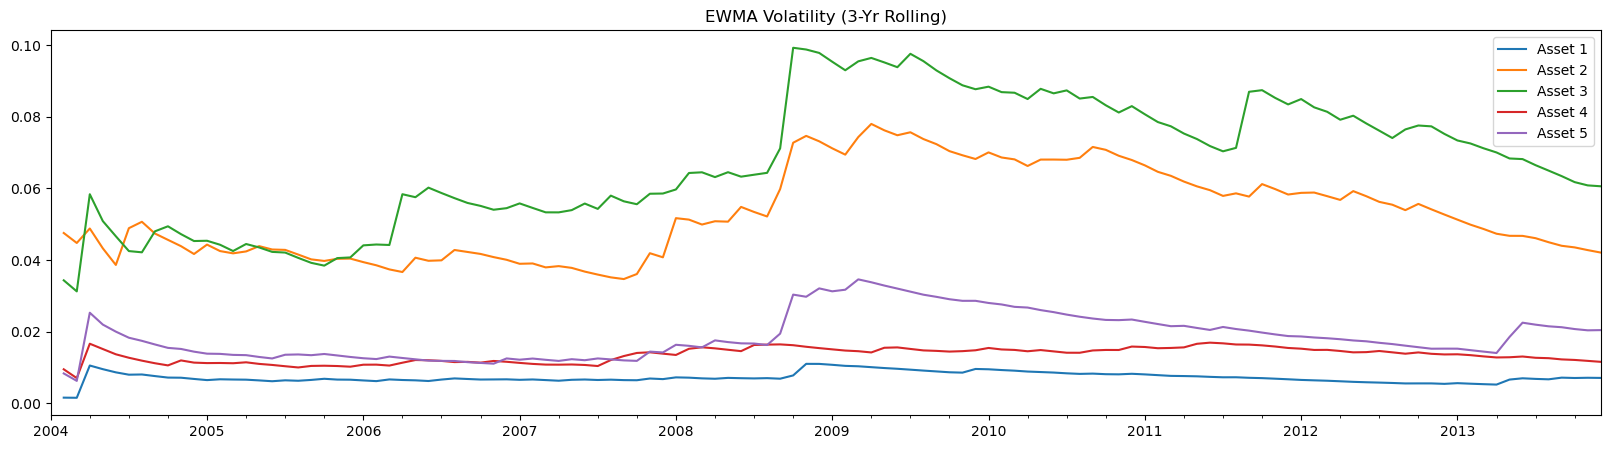

In [6]:
import matplotlib.pyplot as plt

ewma_vol = log_returns.ewm(span=36, adjust=False).std()
ewma_vol.plot(figsize=(20, 5), title="EWMA Volatility (3-Yr Rolling)")
plt.show()

plotting log_rets against normal pdf

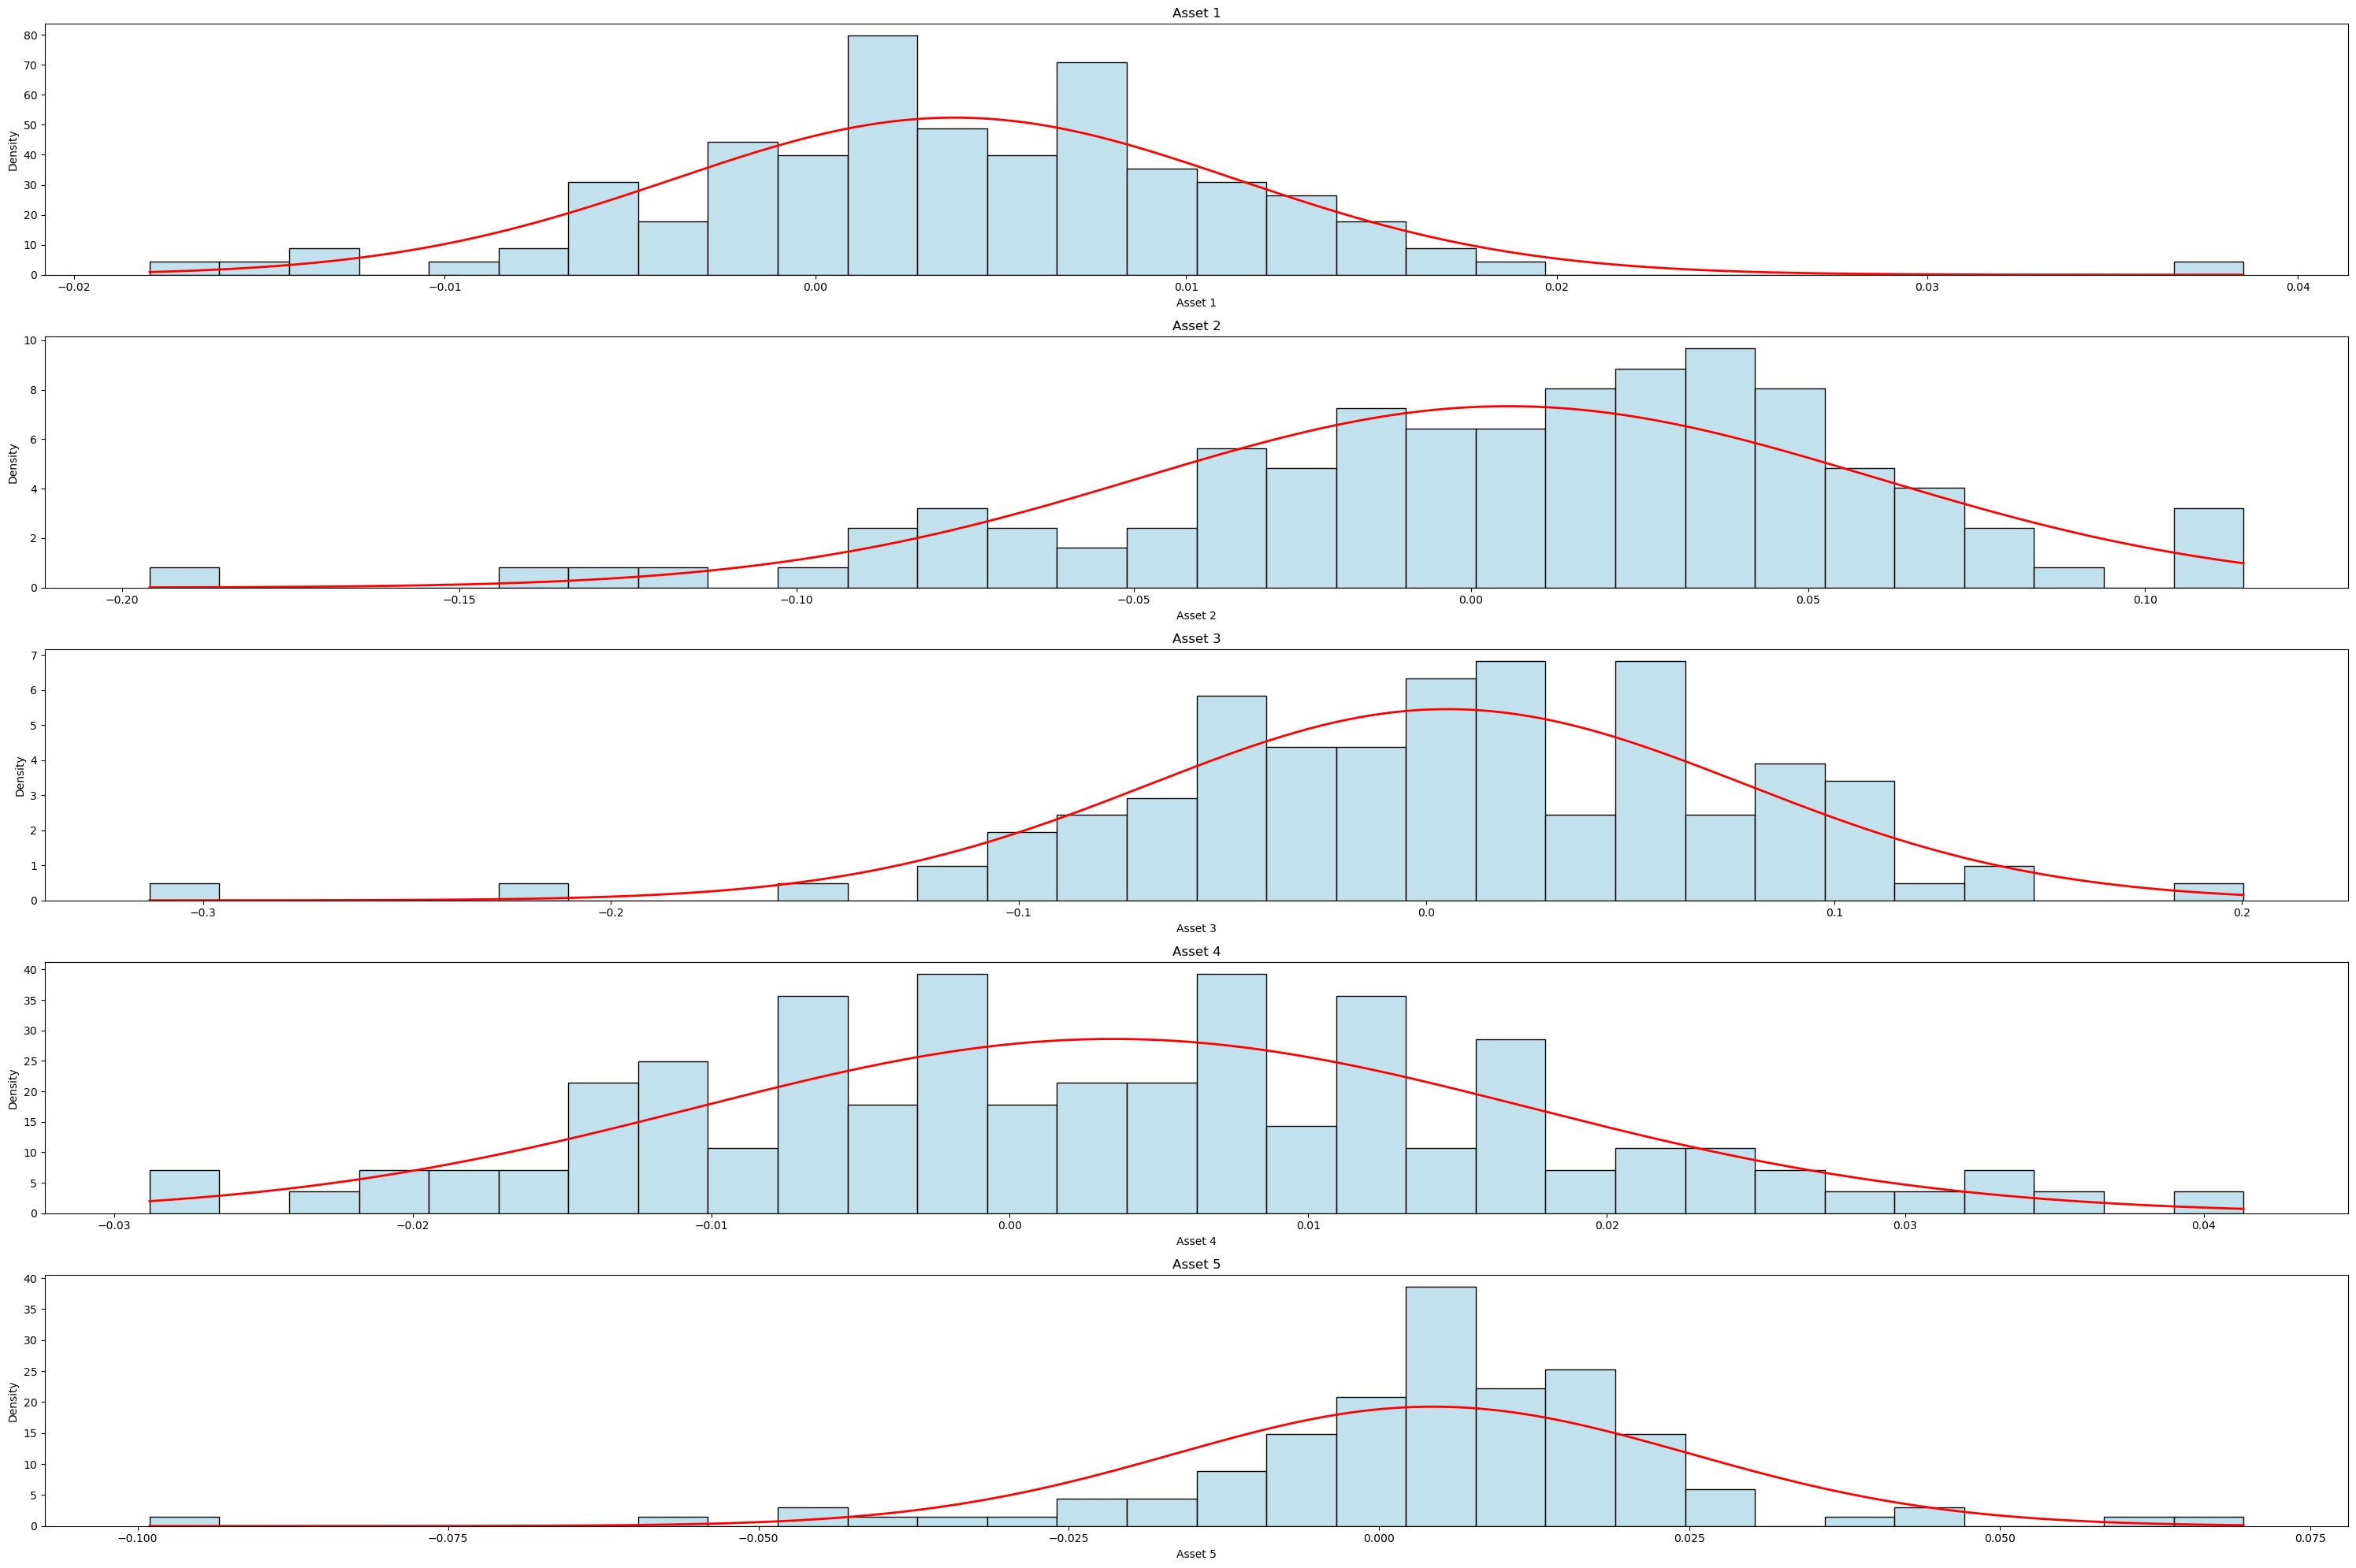

In [9]:
gig, axes = plt.subplots(5,1, figsize=(30,20))

for i, col in enumerate(log_returns.columns[:5]):
    data = log_returns[col].dropna()
    mu, sigma = data.mean(), data.std()

    sns.histplot(data, ax = axes[i], bins = 30, stat = 'density', color = 'lightblue', kde = False)

    # overlay a normal distribution pdf
    x = np.linspace(data.min(), data.max(), 1000)
    p = norm.pdf(x, mu, sigma)
    axes[i].plot(x, p, "r", linewidth = 2.)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()